# Human Dataset Pre-processing and Analyzing

In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
human_data = load_dataset("umarigan/turkish_wikipedia_dataset_NER")

In [3]:
data = pd.DataFrame(human_data['train'])
data.head()

,id,text,title,ner,cleaned_ners,cleaned_new
0,16,Film şu anlamlara gelebilir: * Camlara yapıştı...,Film (anlam ayrımı),"[{'end': 188, 'entity': 'I-ORG', 'index': 38, ...","[Sam, Bec, To, Film, İngiltere]","[Sam, Bec, İngiltere, Film]"
1,30,"Bolşevik, çoğunluktan yana anlamına gelen Rusç...",Bolşevizm,"[{'end': 85, 'entity': 'B-ORG', 'index': 17, '...","[Rusya, Sosyal, Demokrat, İşçi, Partisi, nin, ...","[İşçi, Ekim, Londra, Partisi, Brüksel, Birliği..."
2,39,küçükresim|200px|Cinepaint ekran yakalama görü...,Cinepaint,"[{'end': 55, 'entity': 'B-ORG', 'index': 15, '...","[Cin, Film, Gi, Cin]","[Film, Cin]"
3,24,Linux (telaffuz: Lin-uks); Linux çekirdeğine d...,Linux,"[{'end': 32, 'entity': 'B-ORG', 'index': 11, '...","[Uni, G, Genel, Kamu, Lisans, Linux, Vakfı, Li...","[Lin, bülten, Uni, Richard, Stal, Lisans, Gene..."
4,10,"Cengiz Han (doğum adıyla Temuçin, – 18 Ağustos...",Cengiz Han,"[{'end': 6, 'entity': 'B-PER', 'index': 1, 'sc...","[Cengiz, Han, İmparatorluğu, Cengiz, Han, Orta...","[Nehri, Bulgar, Cengiz, Orta, Xia, Tarihi, İmp..."


In [4]:
# We do not need the NER tags nor the title, so we will drop them
data = data.drop(columns=['title', 'ner', 'cleaned_ners', 'cleaned_new'])
data.columns

Index(['id', 'text'], dtype='object')

In [5]:
# We will now create new columns that will contain the number of characters and words in the text
data['text_length'] = data['text'].apply(lambda x: len(x))
data['num_words'] = data['text'].apply(lambda x: len(x.split()))
data.head()

,id,text,text_length,num_words
0,16,Film şu anlamlara gelebilir: * Camlara yapıştı...,530,69
1,30,"Bolşevik, çoğunluktan yana anlamına gelen Rusç...",8924,1096
2,39,küçükresim|200px|Cinepaint ekran yakalama görü...,253,33
3,24,Linux (telaffuz: Lin-uks); Linux çekirdeğine d...,17678,2243
4,10,"Cengiz Han (doğum adıyla Temuçin, – 18 Ağustos...",105641,13853


In [6]:
data.shape

(265000, 4)

In [7]:
data.describe()

,id,text_length,num_words
count,2.650000e+05,265000.000000,265000.000000
mean,9.909467e+05,2444.496611,335.448955
std,7.190184e+05,5347.812227,732.749545
min,1.000000e+01,16.000000,2.000000
25%,2.801188e+05,486.000000,61.000000
50%,9.630830e+05,1053.000000,138.000000
75%,1.574292e+06,2343.000000,319.000000
max,2.161594e+06,429224.000000,62923.000000


In [8]:
data.isnull().sum()

id             0
text           0
text_length    0
num_words      0
dtype: int64

In [9]:
# Average number of words in the texts
data['num_words'].mean()

335.4489547169811

In [10]:
# The minimum and maximum number of words in all texts
data['num_words'].min(), data['num_words'].max()

(2, 62923)

In [11]:
# Average number of characters in the texts
data['text_length'].mean()

2444.4966113207547

In [12]:
# The minimum and maximum number of characters in all texts
data['text_length'].min(), data['text_length'].max()

(16, 429224)

We need to check the data thoroughly before constructing the AI generated dataset so that the datasets are similar in some context.

## EDA

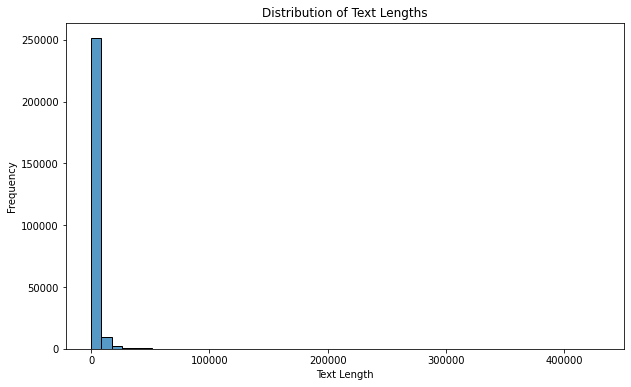

In [13]:
# Text Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

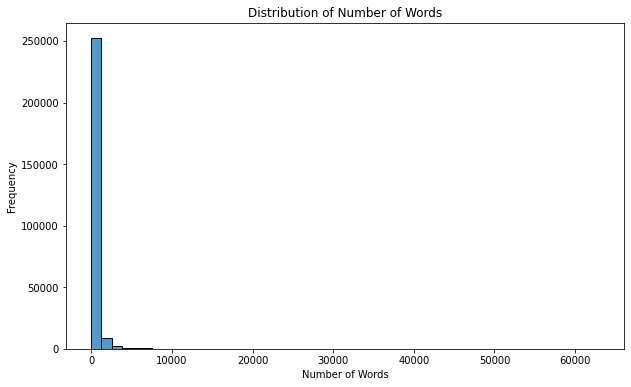

In [11]:
# Number of Words Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['num_words'], bins=50)
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

As it can be seen here most of the texts have less than 8000 words and 50000 characters. Rest of the data can be marked as corrupted and dropped. The reason for this is that some algorithms have a token limit which 50000 characters can be challenging enough. So it is the best to save computation time and efficiency. 

In [16]:
# Drop rows with more than 8000 words
data = data[data['num_words'] <= 8000]
data.shape

(264278, 4)

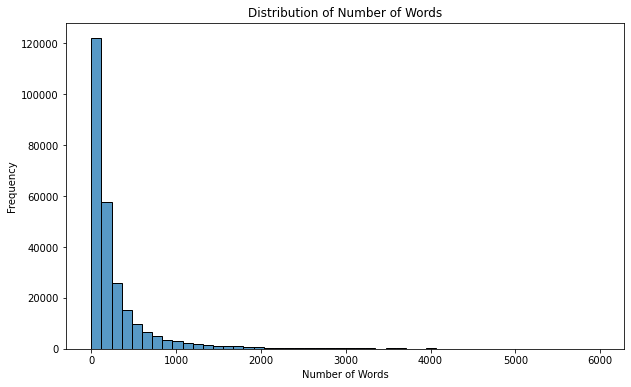

In [17]:
# Number of Words Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['num_words'], bins=50)
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

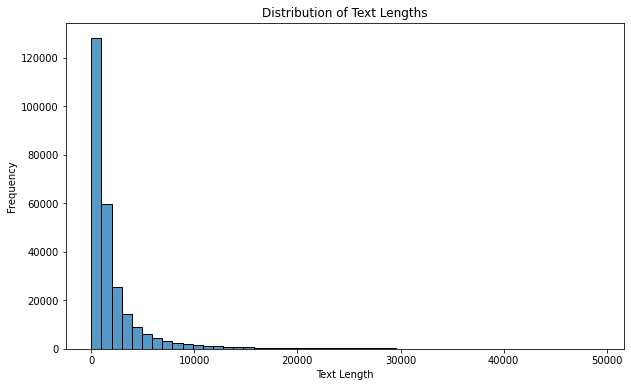

In [20]:
# Text Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [21]:
data.shape

(264278, 4)

It can be said that there were not many extremely long texts anyways from the shape of the dataset

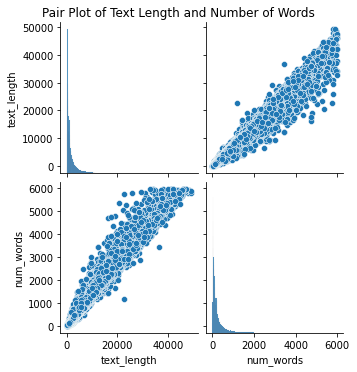

In [25]:
# Pair Plot
sns.pairplot(data[['text_length', 'num_words']])
plt.suptitle('Pair Plot of Text Length and Number of Words', y=1.02)
plt.show()